In [159]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


def get_json(data_file):
    with open(data_file) as data_file:
        data = json.load(data_file)

    dict1 = [{
        'name': str(x['updatedRm']['index']) + '-' + str(x['updatedRm']['name']),
        'totalError': x['totalError'],
        'hf': x['hf'],
        'refHf': x['updatedRm']['datum'][0],
        'ie': x['ie'],
        'refIe': x['updatedRm']['datum'][2],
        'dipole': x['dipole'],
        'refDipole': x['updatedRm']['datum'][1],
        'geomError': x['geomGradMag'],
        'hasGeom': 'expGeom' in x['updatedRm']
    } for x in data['results']]

    return pd.DataFrame(dict1);


datafiles = ["run0.json", "chnof-du1-justgradient.json", "chnof-du1-justqa.json", "chnof-du1-rfo.json"]
dfs = [get_json(x) for x in datafiles]
dfs

[               name   totalError          hf  refHf         ie  refIe  \
 0              0-H1  1523.010021  326.674239  365.7  -0.000000    0.0   
 1              1-H1     0.000004   52.102000   52.1  11.906276    0.0   
 2              2-H2   822.581718    0.718497    0.0  15.747221   15.4   
 3              3-C1  1696.853124  389.407123  430.6  18.695558    0.0   
 4              4-C1     0.000100  170.890000  170.9   9.475558    0.0   
 ...             ...          ...         ...    ...        ...    ...   
 1201  1201-H6C7O4F6  1663.469889 -419.714342 -460.5  12.276649    0.0   
 1202     1202-C6F10  1504.725274 -423.109211 -461.9  12.139606    0.0   
 1203   1203-C5N1F11  1764.236307 -436.897187 -478.9  13.345950    0.0   
 1204   1204-C2N5F11     0.909032  -85.353432  -84.4  12.806914    0.0   
 1205     1205-C6F12  4618.110013 -522.543323 -590.5  13.397135    0.0   
 
             dipole  refDipole  geomError  hasGeom  
 0     0.000000e+00        0.0   0.000000    False  
 1  

In [251]:
datanames = ["original", "gradient", "qa", "rfo"]

for i in range(len(dfs)):
    df = dfs[i]
    df["hfError"] = df["hf"] - df["refHf"]
    df["refIe"] = df["refIe"][df["refIe"] != 0]
    df["ieError"] = df["ie"] - df["refIe"]
    df["refDipole"] = df["refDipole"][df["refDipole"] != 0]
    df["dipoleError"] = df["dipole"] - df["refDipole"]
    df["geomError"] = df["geomError"][df["hasGeom"] == True]
    df["optMethod"] = datanames[i]

dfs[0]

,name,totalError,hf,refHf,ie,refIe,dipole,refDipole,geomError,hasGeom,hfError,ieError,dipoleError,optMethod
0,0-H1,1523.010021,326.674239,365.7,-0.000000,NaN,0.000000e+00,NaN,NaN,False,-39.025761,NaN,NaN,original
1,1-H1,0.000004,52.102000,52.1,11.906276,NaN,0.000000e+00,NaN,NaN,False,0.002000,NaN,NaN,original
2,2-H2,822.581718,0.718497,0.0,15.747221,15.4,7.074176e-16,NaN,40.249452,True,0.718497,0.347221,NaN,original
3,3-C1,1696.853124,389.407123,430.6,18.695558,NaN,0.000000e+00,NaN,NaN,False,-41.192877,NaN,NaN,original
4,4-C1,0.000100,170.890000,170.9,9.475558,NaN,0.000000e+00,NaN,NaN,False,-0.010000,NaN,NaN,original
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1201,1201-H6C7O4F6,1663.469889,-419.714342,-460.5,12.276649,NaN,5.538990e+00,NaN,NaN,False,40.785658,NaN,NaN,original
1202,1202-C6F10,1504.725274,-423.109211,-461.9,12.139606,NaN,5.858225e-01,NaN,NaN,False,38.790789,NaN,NaN,original
1203,1203-C5N1F11,1764.236307,-436.897187,-478.9,13.345950,NaN,4.536357e-01,NaN,NaN,False,42.002813,NaN,NaN,original
1204,1204-C2N5F11,0.909032,-85.353432,-84.4,12.806914,NaN,5.512211e-01,NaN,NaN,False,-0.953432,NaN,NaN,original


In [252]:
f = 0.9
outliers = dfs[3][dfs[3].totalError > dfs[3].totalError.quantile(f)]
wellbehaving = dfs[3][dfs[3].totalError < dfs[3].totalError.quantile(f)]
orig_outliers = dfs[0][dfs[0].totalError > dfs[0].totalError.quantile(f)]
orig_wb = dfs[0][dfs[0].totalError < dfs[0].totalError.quantile(f)]

osorted = outliers.sort_values(by='totalError', ascending=False)
osorted.to_csv('outliers.csv')
osorted

,name,totalError,hf,refHf,ie,refIe,dipole,refDipole,geomError,hasGeom,hfError,ieError,dipoleError,optMethod
874,874-O3,20092.960484,24.617633,34.1,12.637991,12.75,1.202682e+00,0.53,199.101935,True,-9.482367,-0.112009,0.672682,rfo
712,712-O2,19533.008004,-27.817831,0.0,12.011798,NaN,1.501008e-14,NaN,193.696548,True,-27.817831,NaN,NaN,rfo
711,711-O2,18726.634530,0.323142,22.0,10.798429,NaN,4.401473e-15,NaN,191.085051,True,-21.676858,NaN,NaN,rfo
1134,1134-O2F1,17787.640020,-55.386945,3.0,12.024399,NaN,5.395908e-03,NaN,169.579507,True,-58.386945,NaN,NaN,rfo
1168,1168-C2N1F3,13419.464877,-118.432299,-118.4,15.010812,NaN,9.467326e-01,1.26,163.586119,True,-0.032299,NaN,-0.313267,rfo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1170,1170-N1O1F3,1261.097018,-14.903828,-39.0,14.133707,NaN,3.220993e-01,NaN,36.890962,True,24.096172,NaN,NaN,rfo
633,633-H18C9O1,1244.228994,-47.826370,-83.1,10.448018,NaN,2.261175e+00,NaN,NaN,False,35.273630,NaN,NaN,rfo
1165,1165-H3C2F3,1240.853526,-182.406442,-178.9,14.593033,13.80,3.498482e+00,2.32,34.932524,True,-3.506442,0.793033,1.178482,rfo
743,743-H8C4O2,1237.417590,-104.714098,-106.5,11.327322,NaN,1.770552e+00,NaN,49.683562,True,1.785902,NaN,NaN,rfo


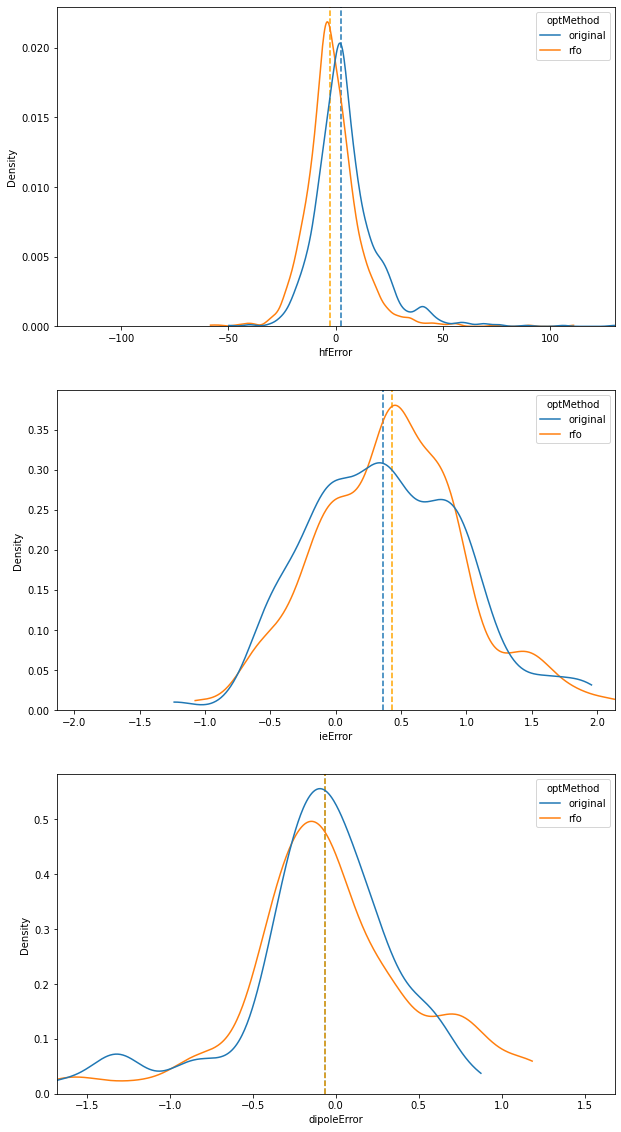

In [286]:
fig, axs = plt.subplots(3, 1, figsize=(10, 20));
axs = axs.flatten()
tgt = dfs[0].append(dfs[3], ignore_index=True);

errorTypes = ["hfError", "ieError", "dipoleError"]
for i, e in enumerate(errorTypes):
    axs[i].axvline(dfs[0][e].median(), linestyle='--')
    axs[i].axvline(dfs[3][e].median(), color='orange', linestyle='--')
    n = max(tgt[e].max(), abs(tgt[e].min()))
    axs[i].set_xlim(-n, n)
    sns.kdeplot(data=tgt, x=e, hue="optMethod", gridsize=500, bw_adjust=0.7, cut=0, ax=axs[i])

plt.savefig('error-dist.png', dpi=600)

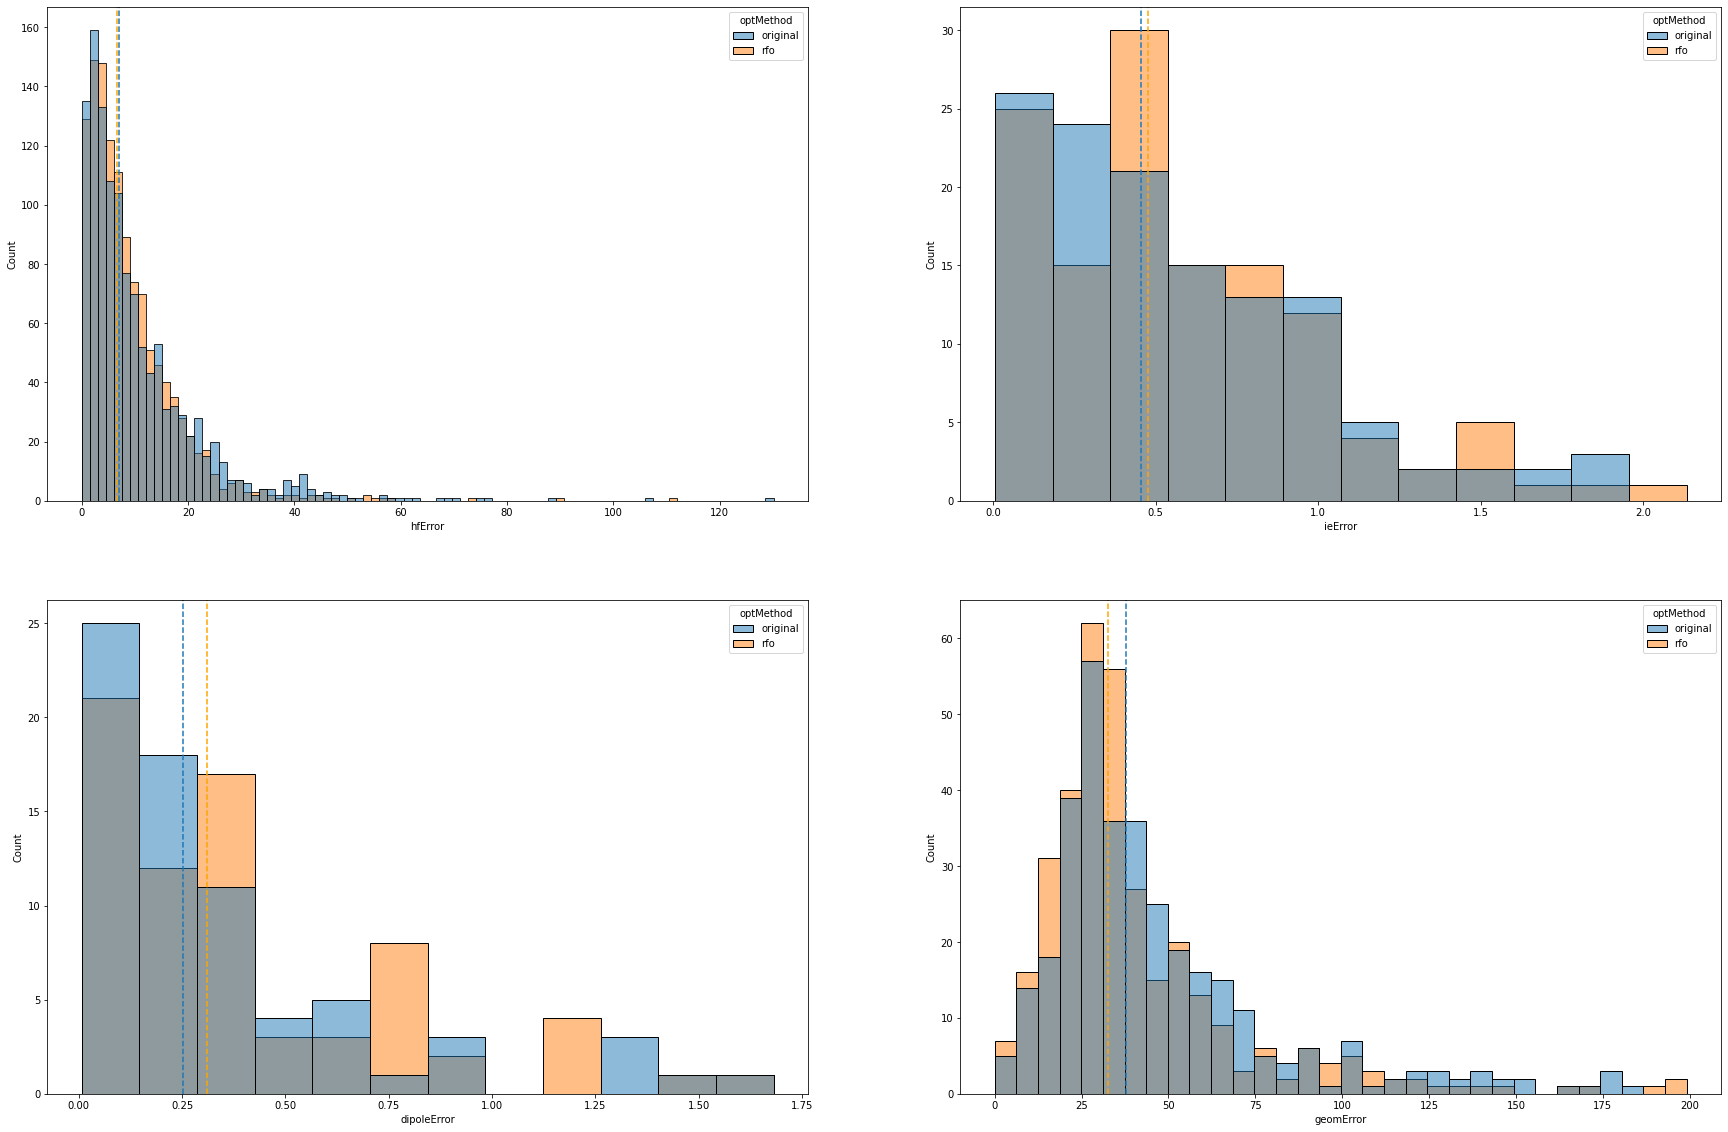

In [284]:
fig, axs = plt.subplots(2, 2, figsize=(30, 20));
axs = axs.flatten()

errorTypes = ["hfError", "ieError", "dipoleError", "geomError"]
for i, e in enumerate(errorTypes):
    axs[i].axvline(dfs[0][e].abs().median(), linestyle='--')
    axs[i].axvline(dfs[3][e].abs().median(), color='orange', linestyle='--')
    sns.histplot(data=tgt, x=tgt[e].abs(), hue="optMethod", ax=axs[i])

plt.savefig('error-hist.png', dpi=600)

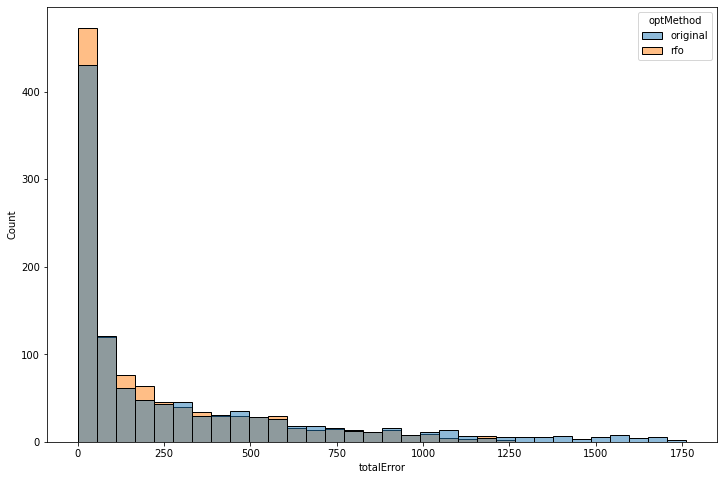

In [285]:
plt.figure(figsize=(12, 8))
sns.histplot(data=orig_wb.append(wellbehaving, ignore_index=True), x='totalError', hue="optMethod")

plt.savefig('total-error-dist.png', dpi=300)

In [256]:
dfs[3].totalError.describe()

count     1206.000000
mean       556.940099
std       1584.418860
min          0.000179
25%         19.170115
50%        116.048943
75%        482.168120
max      20092.960484
Name: totalError, dtype: float64

In [257]:
dfs[0].totalError.describe().apply(lambda x: format(x, 'f'))

count     1206.000000
mean       740.707104
std       1836.219394
min          0.000000
25%         23.723079
50%        153.891789
75%        623.639072
max      16930.266011
Name: totalError, dtype: object

In [258]:
(dfs[3].totalError-dfs[0].totalError).describe()

count     1206.000000
mean      -183.767005
std        934.069692
min     -10644.699559
25%       -201.573312
50%        -24.536792
75%         51.914979
max       7961.294212
Name: totalError, dtype: float64

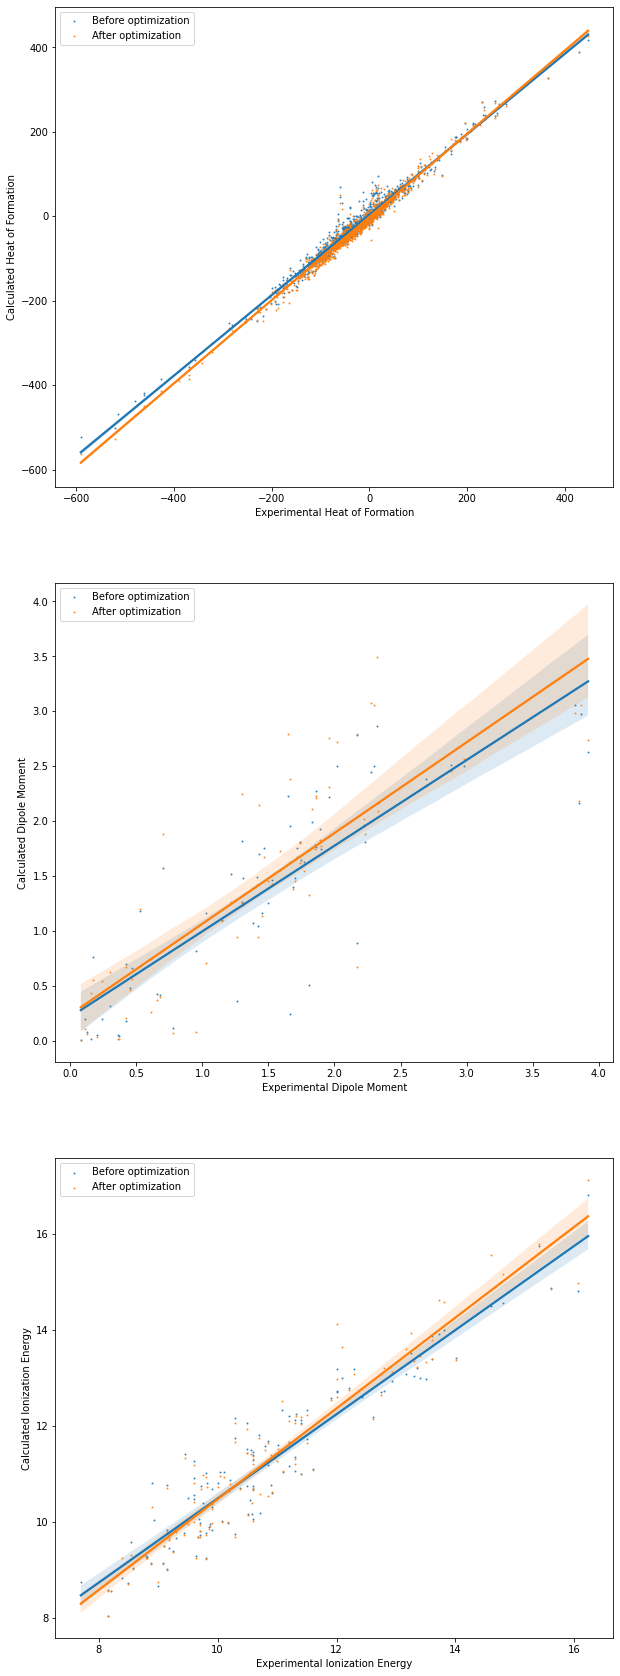

In [283]:
fig, axs = plt.subplots(nrows=3, figsize=(10, 30));
axs = axs.flatten()

betterNames = [('Experimental Heat of Formation', 'Calculated Heat of Formation'),
               ('Experimental Dipole Moment', 'Calculated Dipole Moment'),
               ('Experimental Ionization Energy', 'Calculated Ionization Energy')]
for i, t in enumerate([('refHf', 'hf'), ('refDipole', 'dipole'), ('refIe', 'ie')]):
    sns.regplot(data=dfs[0], x=t[0], y=t[1], ax=axs[i], scatter_kws={'s':1}, label='Before optimization')
    sns.regplot(data=dfs[3], x=t[0], y=t[1], ax=axs[i], scatter_kws={'s':1}, label='After optimization')
    axs[i].legend(loc='upper left')
    axs[i].set(xlabel=betterNames[i][0], ylabel=betterNames[i][1])

plt.savefig('scatter.png', dpi=600)

In [169]:
for et in errorTypes:
    print(et + '\n' + str(dfs[3][et].describe()), '\n')

hfError
count    1206.000000
mean       -1.558992
std        13.003361
min       -58.386945
25%        -8.443942
50%        -2.620440
75%         4.364456
max       110.923244
Name: hfError, dtype: float64 

ieError
count    126.000000
mean       0.430348
std        0.573875
min       -1.074779
25%        0.040636
50%        0.430700
75%        0.786855
max        2.133881
Name: ieError, dtype: float64 

dipoleError
count    72.000000
mean     -0.024041
std       0.551560
min      -1.670290
25%      -0.313540
50%      -0.065147
75%       0.283270
max       1.183728
Name: dipoleError, dtype: float64 

geomError
count    338.000000
mean      41.372333
std       30.873483
min        2.384769
25%       22.821303
50%       32.502900
75%       49.634822
max      199.101935
Name: geomError, dtype: float64 

totalError
count     1206.000000
mean       556.940099
std       1584.418860
min          0.000179
25%         19.170115
50%        116.048943
75%        482.168120
max      20092.960484
N

,name,error,hf,refHf,ie,refIe,dipole,refDipole,geomError,hfError,ieError,dipoleError,optMethod
0,0-H1,1512.268846,326.812099,365.7,-0.000000,0.0,0.000000e+00,0.00,0.000000,-38.887901,-0.000000,0.000000e+00,rfo
3,3-C1,1757.458412,388.677948,430.6,18.695822,0.0,0.000000e+00,0.00,0.000000,-41.922052,18.695822,0.000000e+00,rfo
7,7-H2C1,1309.463333,70.232816,99.8,9.913681,0.0,4.850352e-01,0.00,29.504067,-29.567184,9.913681,4.850352e-01,rfo
20,20-H3C3,5626.268450,268.846499,257.0,19.132240,0.0,6.388737e-08,0.00,104.746636,11.846499,19.132240,6.388737e-08,rfo
33,33-C4,1640.935870,271.631726,232.0,9.884402,0.0,4.352246e-08,0.00,11.854297,39.631726,9.884402,4.352246e-08,rfo
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1168,1168-C2N1F3,13419.464877,-118.432299,-118.4,15.010812,0.0,9.467326e-01,1.26,163.586119,-0.032299,15.010812,-3.132674e-01,rfo
1170,1170-N1O1F3,1261.097018,-14.903828,-39.0,14.133707,0.0,3.220993e-01,0.00,36.890962,24.096172,14.133707,3.220993e-01,rfo
1171,1171-H1C2O2F3,1675.459023,-248.609998,-255.0,12.975448,12.0,3.076691e+00,2.28,50.706805,6.390002,0.975448,7.966914e-01,rfo
1193,1193-C6F6,4165.206518,-241.995491,-242.5,11.395933,10.9,2.472017e-07,0.00,90.998429,0.504509,0.495933,2.472017e-07,rfo
